In [ ]:
####################### IMPORTING ALL LIBRARIES #############################

# Core
import os
import json
import random
import itertools

# Math & Analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

# Image Processing
from PIL import Image, ImageDraw

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Vision
import torchvision.models as models
import torchvision.transforms as transforms

# Machine Learning
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances

# Similarity Search
import faiss

# Language Modeling
from typing import List
from anthropic import Anthropic


# HTTP Requests
import requests
from dotenv import load_dotenv

##########################################################################
# Setting working directory
os.chdir("/Users/parsakeyvani/Downloads/spring-2025-final-project-project-group-4-1")
print("Current working directory:", os.getcwd())

Current working directory: /Users/hannahkim/Desktop/SCHOOL/GEORGETOWN/DSAN-6725/spring-2025-final-project-project-group-4/Parsa/testing_code


🌤️ Current temperature in Washington: 17°C

🌤️ Using temperature: 17°C
🎯 Occasion detected: sporty



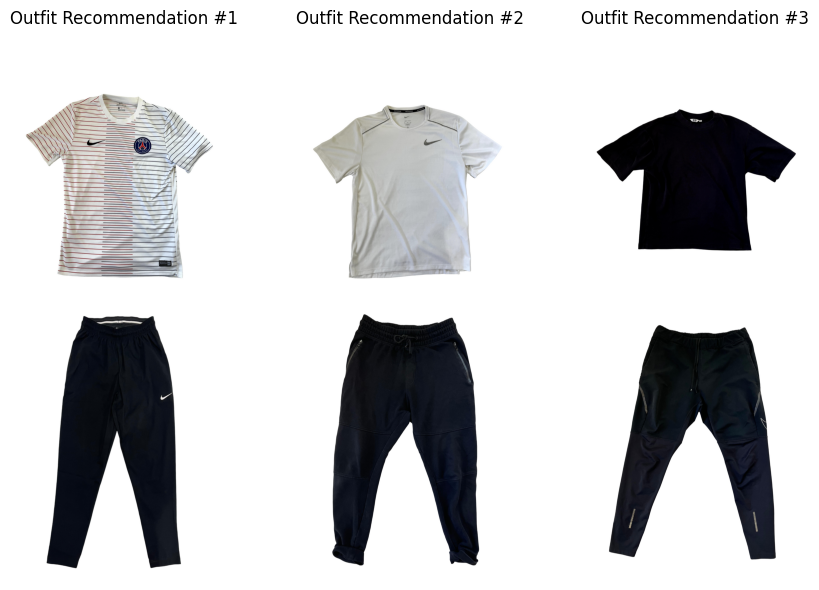


🧠 Your Personal Stylist Says:
Alright, let's take a look at these outfit options!

Outfit 1: This one gives off a clean, classic sporty vibe. The white tee and black pants are a simple, versatile combo that's perfect for an active day.

Outfit 2: This is also a solid sporty look. The white tee and black pants are similar to Outfit 1, but the slightly different pant style gives it a slightly more relaxed, casual feel.

Outfit 3: This one has a bit more of an edgy, bold look with the black tee and pants. It's still sporty, but has a hint of casual streetwear style as well.

Overall, I'd recommend going with Outfit 1. It's a straightforward sporty look that will be comfortable and appropriate for the 17°C weather. The simplicity of the white tee and black pants is a classic sporty combo that's hard to beat. Outfit 2 is a close second, but Outfit 1 just has a slightly cleaner, more streamlined vibe to it.

Let me know if you need any other suggestions!

✅ Pants locked from Outfit 1!

🌤️ U

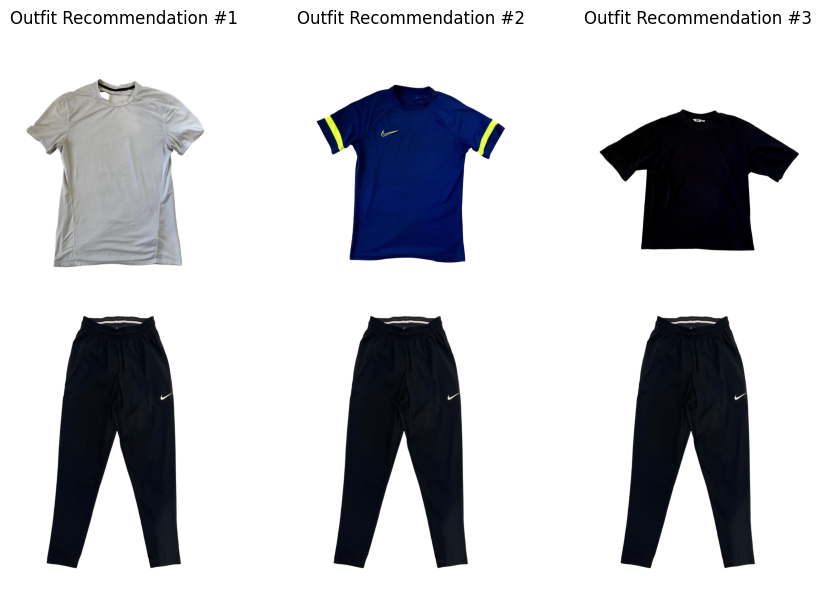


🧠 Your Personal Stylist Says:
Alright, let's break down these sporty outfits:

Outfit 1: This gives off a clean, classic sporty vibe. The white tee and black pants are a simple, versatile combo that works well for everyday activities or light workouts.

Outfit 2: The navy tee adds a bit more style and personality to the look. Still sporty, but with a slightly more put-together feel.

Outfit 3: This one's got a bolder, more casual-cool look. The black tee with the sporty pants has an edgier, streetwear-inspired vibe.

For the temperature of 17°C, I'd recommend going with Outfit 2. The navy tee is a nice middle ground - not too plain, but not too intense either. It's a solid sporty look that's still stylish. Plus, the black pants work great for the slightly cooler weather.

🔓 Unlocked pants.
✅ Top locked from Outfit 2!

🌤️ Using temperature: 17°C
🎯 Occasion detected: sporty



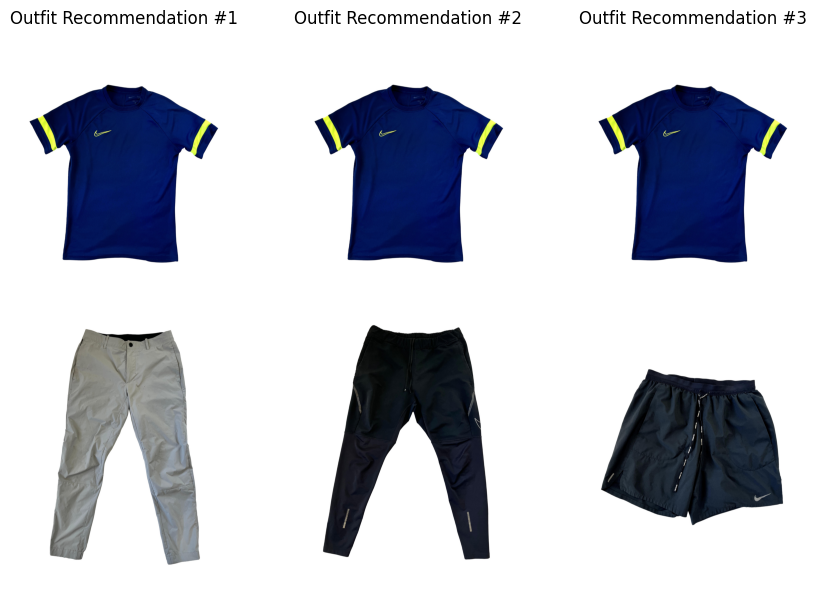


🧠 Your Personal Stylist Says:
Hey dude! Alright, let's take a look at these sporty outfit options:

Outfit 1:
This one gives off a more casual, relaxed vibe. The gray pants add a laidback touch to the sporty navy tee. It's a good option if you want to feel comfy and chill.

Outfit 2: 
This one is a bit more on the sporty side. The black pants have a more athletic look, so this outfit would make you feel ready to hit the gym or go for a run. It's a solid choice if you want to embrace the sporty aesthetic.

Outfit 3:
This one is the most sporty of the bunch. The black shorts scream "athleisure" and would make you feel ready to crush a workout or just hang out in a casual, active way. This is the boldest option.

Final verdict? I'd go with Outfit 2. The black pants give it a more polished, put-together sporty vibe that I think works great for 17°C weather. But you really can't go wrong - all three are solid sporty options. Let me know if you need any other advice, my dude!


🌤️ Using tem

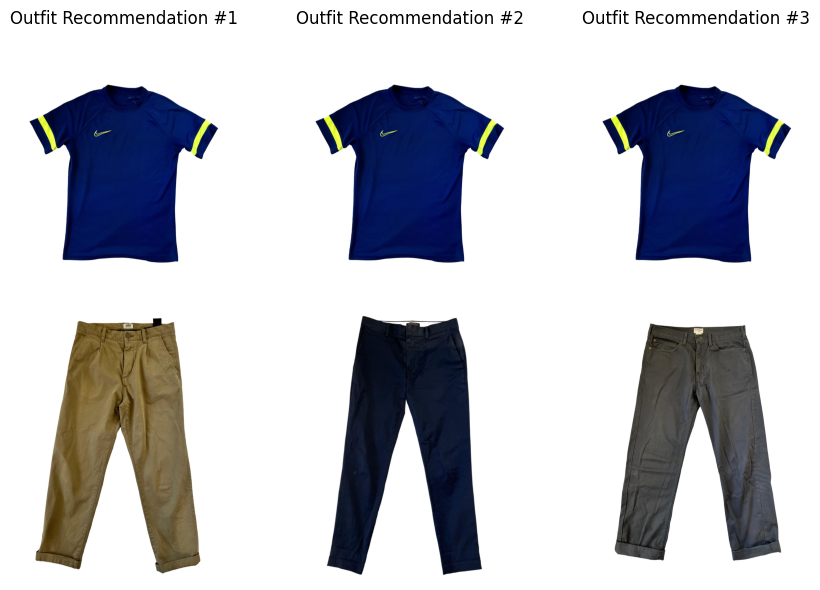


🧠 Your Personal Stylist Says:
Alright, let's do this!

Outfit 1:
This gives off a more casual, laid-back vibe. The khaki pants are versatile and can work for both casual and slightly more formal situations. It's a safe, everyday kind of look.

Outfit 2:
This is a bit more put-together. The navy pants give a slightly dressier feel, but it still maintains a sporty, casual aesthetic. This is a solid option if you want to look a bit more polished.

Outfit 3:
The charcoal pants give this outfit a slightly bolder, more urban feel. It's a more casual, streetwear-inspired look. If you want to feel a bit more stylish and edgy, this could be the way to go.

My verdict: I'd go with Outfit 2. The navy pants complement the navy t-shirt nicely, and it strikes a nice balance between casual and slightly more refined. It's a versatile look that you can dress up or down as needed. Plus, it's a classic color combo that always looks good.


🌤️ Using temperature: 17°C
🎯 Occasion detected: sporty



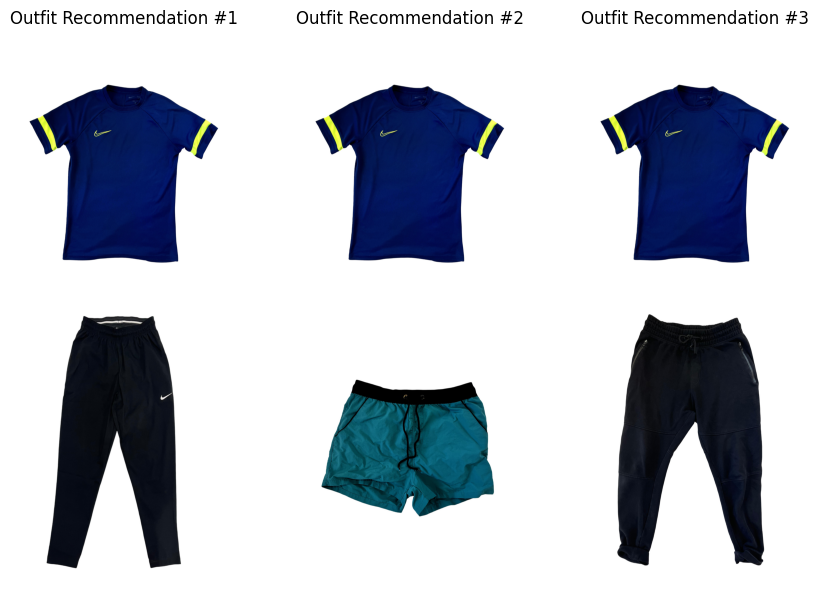


🧠 Your Personal Stylist Says:
Okay, let's go through these outfits one by one:

Outfit 1:
This one gives off a more casual, everyday sporty vibe. The navy tee and black pants are a classic combo that's comfortable and low-key.

Outfit 2: 
This one is a bit more fun and youthful with the teal shorts. It has a more active, athletic feel to it.

Outfit 3:
This is similar to Outfit 1, but the black pants make it look a bit more polished and put-together. Still sporty, but a touch more refined.

Hmm, for the 17°C weather, I'd probably go with Outfit 2. The teal shorts are perfect for that temp and the sporty vibe is on point. Plus, it's a little more unique than the basic tee and pants combo. What do you think? Wanna give the teal shorts a try?

👋 Bye! Stay stylish.


In [ ]:
load_dotenv()
client = Anthropic(api_key=os.getenv("ANTHROPIC_API_KEY"))

# Load clothing data and embeddings
with open("Parsa/testing_code/clothing_embeddings.json") as f:
    clothing_data = json.load(f)

metadata_list = []
embedding_list = []

for item in clothing_data:
    metadata_list.append({k: item[k] for k in item if k != "embedding"})
    embedding_list.append(item["embedding"])

embedding_array = np.array(embedding_list).astype("float32")

# Create FAISS index
embedding_dim = embedding_array.shape[1]
faiss_index = faiss.IndexFlatL2(embedding_dim)
faiss_index.add(embedding_array)

# Weather Tool
class WeatherTool:
    def __init__(self):
        self.api_key = "f1283ef123b044ce41499b0b3fe12241"

    def get_temperature(self, city="Washington", country="US"):
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={self.api_key}&units=metric"
        response = requests.get(url)
        data = response.json()
        if "main" in data:
            return round(data["main"]["temp"])
        else:
            raise ValueError(f"Failed to fetch weather data: {data}")

# Occasion Parser
def parse_occasion(user_input):
    user_input = user_input.lower()
    if any(word in user_input for word in ["date", "romantic"]):
        return "date night"
    if any(word in user_input for word in ["interview", "meeting"]):
        return "job interview"
    if any(word in user_input for word in ["beach", "walk"]):
        return "beach walk"
    if any(word in user_input for word in ["chill", "weekend", "hang"]):
        return "chill weekend hang"
    if any(word in user_input for word in ["formal"]):
        return "formal"
    if any(word in user_input for word in ["gym", "run", "sporty"]):
        return "sporty"
    return "casual"

# Wardrobe Filter
def filter_wardrobe(wardrobe, temperature, occasion, color_preference=None):
    suitable = []
    for item in wardrobe:
        item_styles = item.get("style", [])
        if isinstance(item_styles, str):
            item_styles = [item_styles]

        if occasion in item_styles:
            if temperature < 15:
                if item["category"] == "pants" or item.get("sleeve", "") == "long":
                    suitable.append(item)
                elif item["category"] in ["shirt", "t-shirt"]:
                    suitable.append(item)
            else:
                suitable.append(item)

    if len(suitable) < 2:
        suitable = [item for item in wardrobe if occasion in item.get("style", []) or "casual" in item.get("style", [])]

    if color_preference:
        if color_preference in ["dark", "bright"]:
            suitable = [item for item in suitable if color_preference in item.get("color", "").lower()] or suitable
        else:
            suitable = [item for item in suitable if color_preference.lower() in item.get("color", "").lower()] or suitable

    return suitable

# Generate Recommendations
def generate_outfit_recommendations(user_input, temperature, gender, outfits: List[List[dict]]):
    prompt = f"""
Hey, you're my stylish buddy helping me get dressed.
I'm a {gender} and I'm trying to figure out what to wear.

Here’s the situation:
"{user_input}" (temperature is {temperature}°C)

Here are three outfit combos I’m considering:
"""

    for i, outfit in enumerate(outfits):
        prompt += f"\nOutfit {i+1}:\n{json.dumps(outfit, indent=2)}\n"

    prompt += """
For each one, tell me what kind of vibe it gives off — like if I want to feel chill, sporty, bold, etc.
Then give me your final verdict on which one to wear and why. Keep it casual and short, like we're texting.
"""

    completion = client.messages.create(
        model="claude-3-haiku-20240307",
        max_tokens=300,
        temperature=0.8,
        messages=[{"role": "user", "content": prompt}]
    )

    return [completion.content[0].text.strip()]

# Visual Display
def display_selected_outfit(outfits):
    category_folder_map = {
        "shirt": "shirts",
        "t-shirt": "t-shirts",
        "pants": "pants",
        "shorts": "shorts"
    }

    num_outfits = len(outfits)
    fig, axs = plt.subplots(2, num_outfits, figsize=(3 * num_outfits, 6), gridspec_kw={'hspace': 0.0})

    for col, outfit in enumerate(outfits):
        for row, item in enumerate(outfit):
            path = os.path.join("Parsa/parsa's_wardrobe", category_folder_map[item["category"]], item["filename"])
            img = Image.open(path).convert("RGB")
            axs[row, col].imshow(img)
            axs[row, col].axis("off")

    for col in range(num_outfits):
        axs[0, col].set_title(f"Outfit Recommendation #{col + 1}", fontsize=12, pad=10)

    plt.subplots_adjust(hspace=0)
    plt.tight_layout()
    plt.show()

# Outfit Agent
def outfit_agent(user_input, temperature, gender="male", refresh=False, lock_top=None, lock_bottom=None, color=None):
    occasion = parse_occasion(user_input)

    print(f"\n\U0001F324️ Using temperature: {temperature}°C")
    print(f"🎯 Occasion detected: {occasion}\n")

    filtered = filter_wardrobe(metadata_list, temperature, occasion, color)
    tops = [item for item in filtered if item["category"] in ["shirt", "t-shirt"]]
    bottoms = [item for item in filtered if item["category"] in ["pants", "shorts"]]

    if refresh:
        random.shuffle(tops)
        random.shuffle(bottoms)

    combinations = []
    for i in range(min(3, len(tops), len(bottoms))):
        top = lock_top if lock_top else tops[i]
        bottom = lock_bottom if lock_bottom else bottoms[i]
        combinations.append([top, bottom])

    responses = generate_outfit_recommendations(user_input, temperature, gender, combinations)
    display_selected_outfit(combinations)

    for i, res in enumerate(responses):
        print(f"\n\U0001F9E0 Your Personal Stylist Says:\n{res}\n")

    return combinations

# Chat Loop
def chat_loop():
    combos = []
    locked_top = None
    locked_bottom = None
    color_preference = None

    # ✅ Fetch the temperature once before the loop starts
    weather_tool = WeatherTool()
    cached_temperature = weather_tool.get_temperature("Washington", "US")
    print(f"🌤️ Current temperature in Washington: {cached_temperature}°C")

    while True:
        user_input = input("\n\U0001F464 You: ").strip().lower()

        if user_input in ["exit", "quit", "bye"]:
            print("👋 Bye! Stay stylish.")
            break

        if "unlock" in user_input:
            if "pants" in user_input:
                locked_bottom = None
                print("🔓 Unlocked pants.")
            if "shirt" in user_input or "top" in user_input:
                locked_top = None
                print("🔓 Unlocked top.")
            continue

        if "lock" in user_input:
            if "pants" in user_input:
                try:
                    idx = int(user_input.split("outfit")[-1].strip()) - 1
                    locked_bottom = combos[idx][1]
                    print(f"✅ Pants locked from Outfit {idx + 1}!")
                except Exception as e:
                    print("❌ Could not lock pants:", e)
                continue

            if "shirt" in user_input or "top" in user_input:
                try:
                    idx = int(user_input.split("outfit")[-1].strip()) - 1
                    locked_top = combos[idx][0]
                    print(f"✅ Top locked from Outfit {idx + 1}!")
                except Exception as e:
                    print("❌ Could not lock top:", e)
                continue

        if any(word in user_input for word in ["blue tops", "red tops", "green tops"]):
            color_preference = user_input.split(" ")[0]
            print(f"🎨 Color preference set to {color_preference} for tops.")

        elif "dark tops" in user_input or "bright tops" in user_input:
            color_preference = "dark" if "dark" in user_input else "bright"
            print(f"🎨 Color preference set to {color_preference}.")

        elif "no color" in user_input:
            color_preference = None
            print("🎨 Color preference cleared.")

        combos = outfit_agent(
            user_input,
            temperature=cached_temperature,
            refresh=True,
            lock_top=locked_top,
            lock_bottom=locked_bottom,
            color=color_preference
        )
# Run it
chat_loop()


In [36]:
import json

# Load metadata
with open("Parsa/parsa's_wardrobe/metadata.json") as f:
    metadata = json.load(f)

# Extract and count unique colors
color_set = set()

for category_items in metadata.values():
    for item in category_items:
        color = item.get("color")
        if color:
            color_set.add(color.lower().strip())

print(f"Total distinct colors: {len(color_set)}")
print("Distinct colors:", sorted(color_set))

Total distinct colors: 16
Distinct colors: ['beige', 'black', 'blue', 'brown', 'charcoal', 'gray', 'khaki', 'light blue', 'mustard', 'navy', 'olive', 'orange', 'peach', 'red', 'teal', 'white']
